In [14]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader


In [11]:
# Define a simple LeNet model
class LeNet(nn.Module):
    def __init__(self, channel=3, hidden=768, num_classes=10):
        super(LeNet, self).__init__()
        self.body = nn.Sequential(
            nn.Conv2d(channel, 12, kernel_size=5, stride=2, padding=2),
            nn.Sigmoid(),
            nn.Conv2d(12, 12, kernel_size=5, stride=2, padding=2),
            nn.Sigmoid(),
            nn.Conv2d(12, 12, kernel_size=5, stride=1, padding=2),
            nn.Sigmoid(),
        )
        self.fc = nn.Linear(hidden, num_classes)

    def forward(self, x):
        x = self.body(x)
        x = x.view(x.size(0), -1)  # Flatten the tensor
        return self.fc(x)

In [15]:

# Dataset loader (MNIST in this case)
def get_dataset(dataset_name='MNIST'):
    if dataset_name == 'MNIST':
        transform = transforms.Compose([transforms.Resize((32, 32)), transforms.ToTensor()])
        train_dataset = datasets.MNIST(root="MNIST/.", train=True, download=True, transform=transform)
        test_dataset = datasets.MNIST(root="MNIST/.", train=False, download=True, transform=transform)
        return train_dataset, test_dataset
    else:
        raise ValueError("Unsupported dataset")


Epoch [1/10], Loss: 2.3106, Accuracy: 10.23%


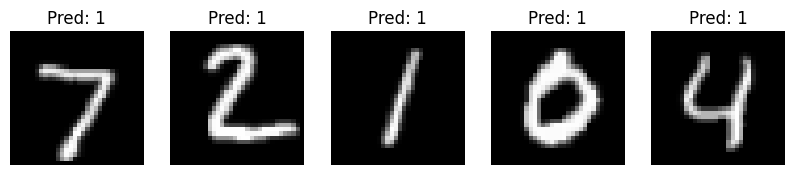

Epoch [2/10], Loss: 2.3052, Accuracy: 10.62%
Epoch [3/10], Loss: 2.3035, Accuracy: 10.79%
Epoch [4/10], Loss: 2.3027, Accuracy: 10.74%
Epoch [5/10], Loss: 2.3025, Accuracy: 10.94%
Epoch [6/10], Loss: 2.3021, Accuracy: 11.08%


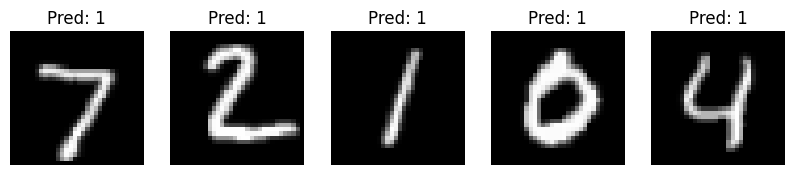

Epoch [7/10], Loss: 2.3019, Accuracy: 11.11%
Epoch [8/10], Loss: 2.3018, Accuracy: 11.18%
Epoch [9/10], Loss: 2.3017, Accuracy: 11.20%
Epoch [10/10], Loss: 2.3014, Accuracy: 11.14%


In [16]:
# Main training loop
def main():
    # Parameters
    batch_size = 32
    lr = 0.01
    num_epochs = 10

    # Load dataset
    train_dataset, test_dataset = get_dataset('MNIST')
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    # Initialize model, loss function, and optimizer
    model = LeNet(channel=1, hidden=768, num_classes=10)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)

    # Training loop
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        avg_loss = running_loss / len(train_loader)
        accuracy = 100 * correct / total

        # Print loss and accuracy every epoch
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%")

        # Visualize some sample images and predictions
        if epoch % 5 == 0:  # Show every 5 epochs
            model.eval()
            images, labels = next(iter(test_loader))
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)

            # Plot some sample images and their predicted labels
            fig, axes = plt.subplots(1, 5, figsize=(10, 2))
            for i in range(5):
                axes[i].imshow(images[i].squeeze(), cmap='gray')
                axes[i].set_title(f'Pred: {predicted[i].item()}')
                axes[i].axis('off')
            plt.show()

if __name__ == '__main__':
    main()